In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('Bank.csv')

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42bf5b1150>,
      dtype=object)

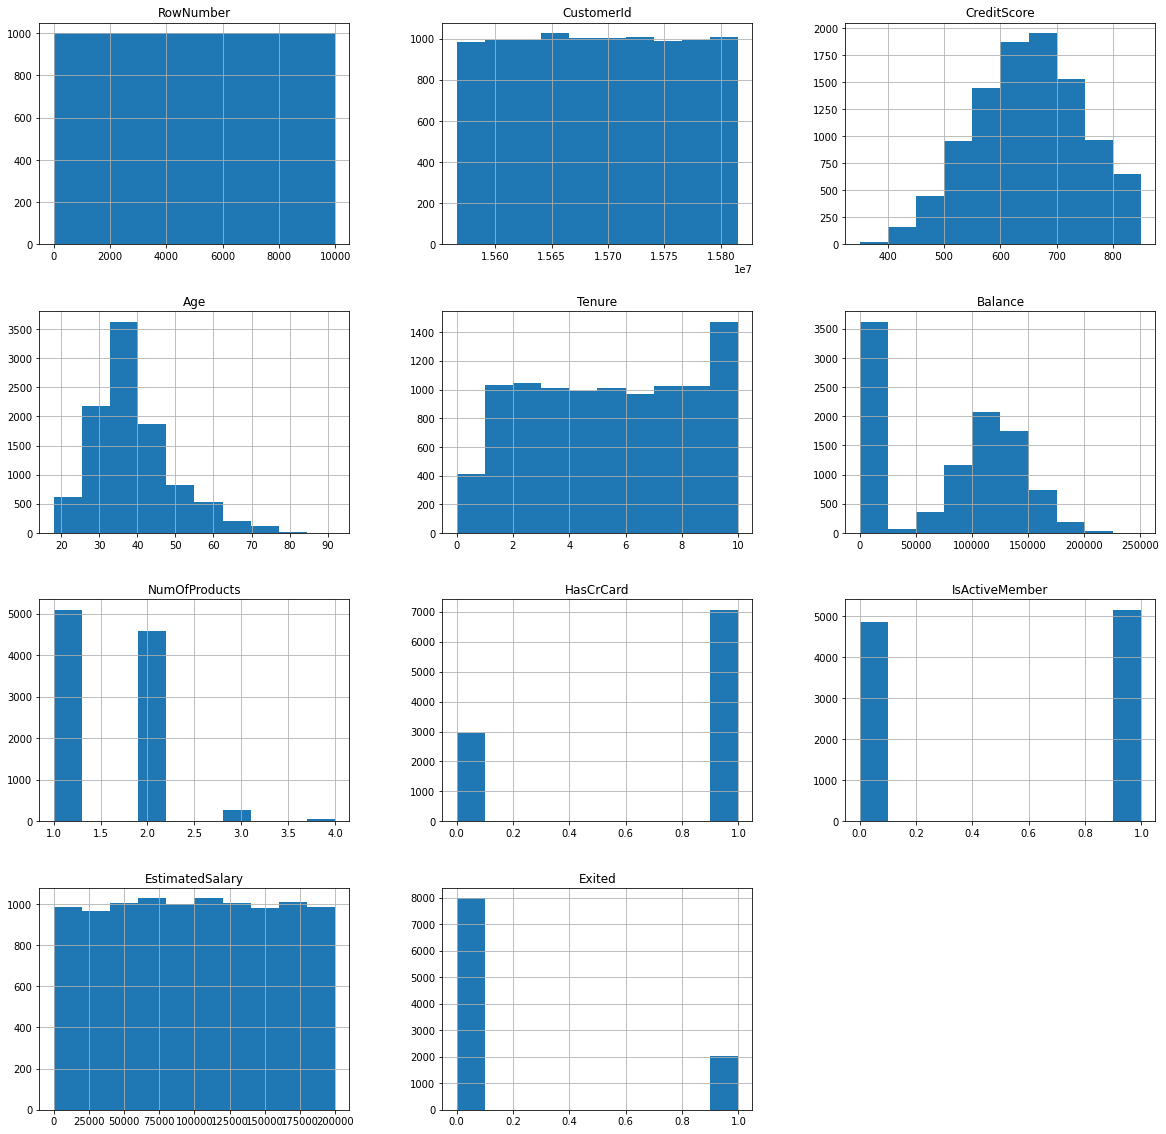

In [ ]:
df.hist(figsize=(20,20))

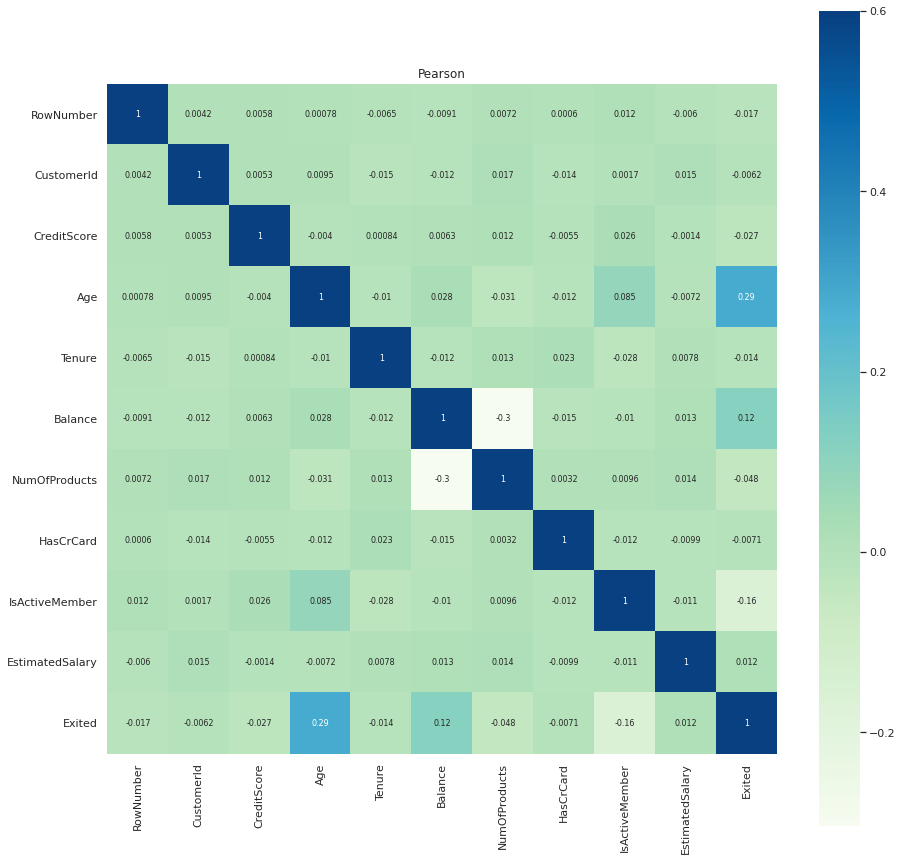

In [ ]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson')
sns.heatmap(df.corr(),vmax=0.6,square=True,cmap='GnBu',linecolor='b',annot=True,annot_kws={"size":8})

In [ ]:
df.loc[df.HasCrCard == 0, 'HasCrCard'] = -1
df.loc[df.IsActiveMember == 0, 'IsActiveMember'] = -1

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,-1,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,-1,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,-1,-1,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,-1,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,-1,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,-1,92888.52,1


In [ ]:
df['TenureAge']=df.Tenure/df.Age

In [ ]:
df['BalanceSalary'] = df.Balance/df.EstimatedSalary
df['CreditAge'] = df.CreditScore/df.Age

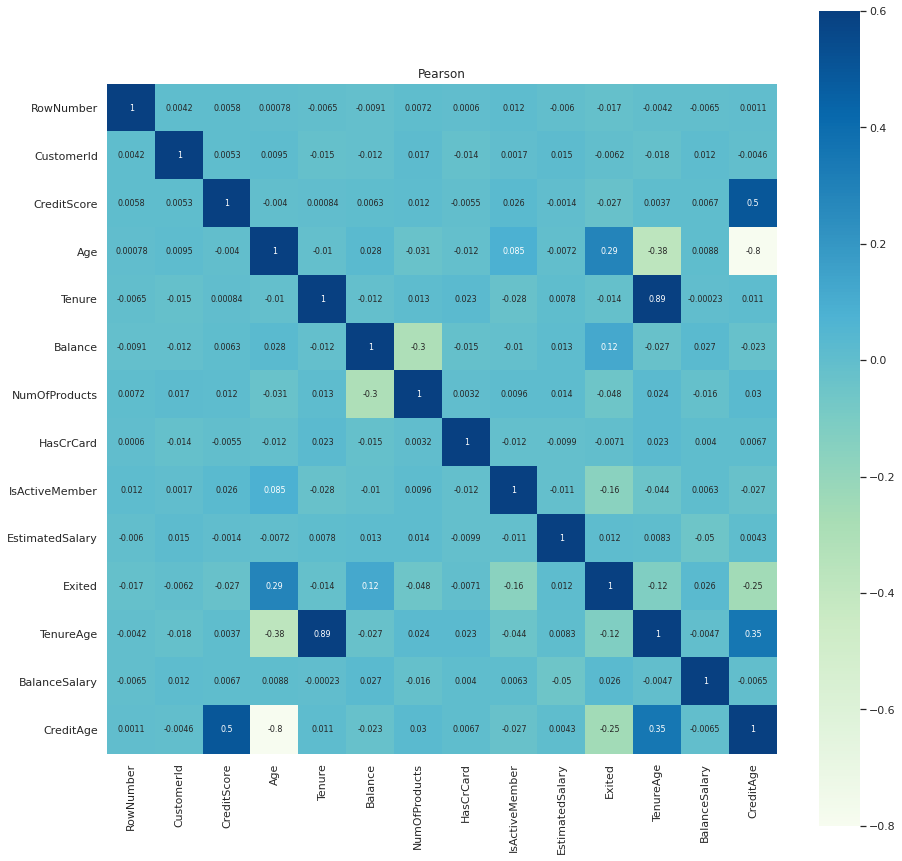

In [ ]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson')
sns.heatmap(df.corr(),vmax=0.6,square=True,cmap='GnBu',linecolor='b',annot=True,annot_kws={"size":8})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42af33ae10>,
      dtype=object)

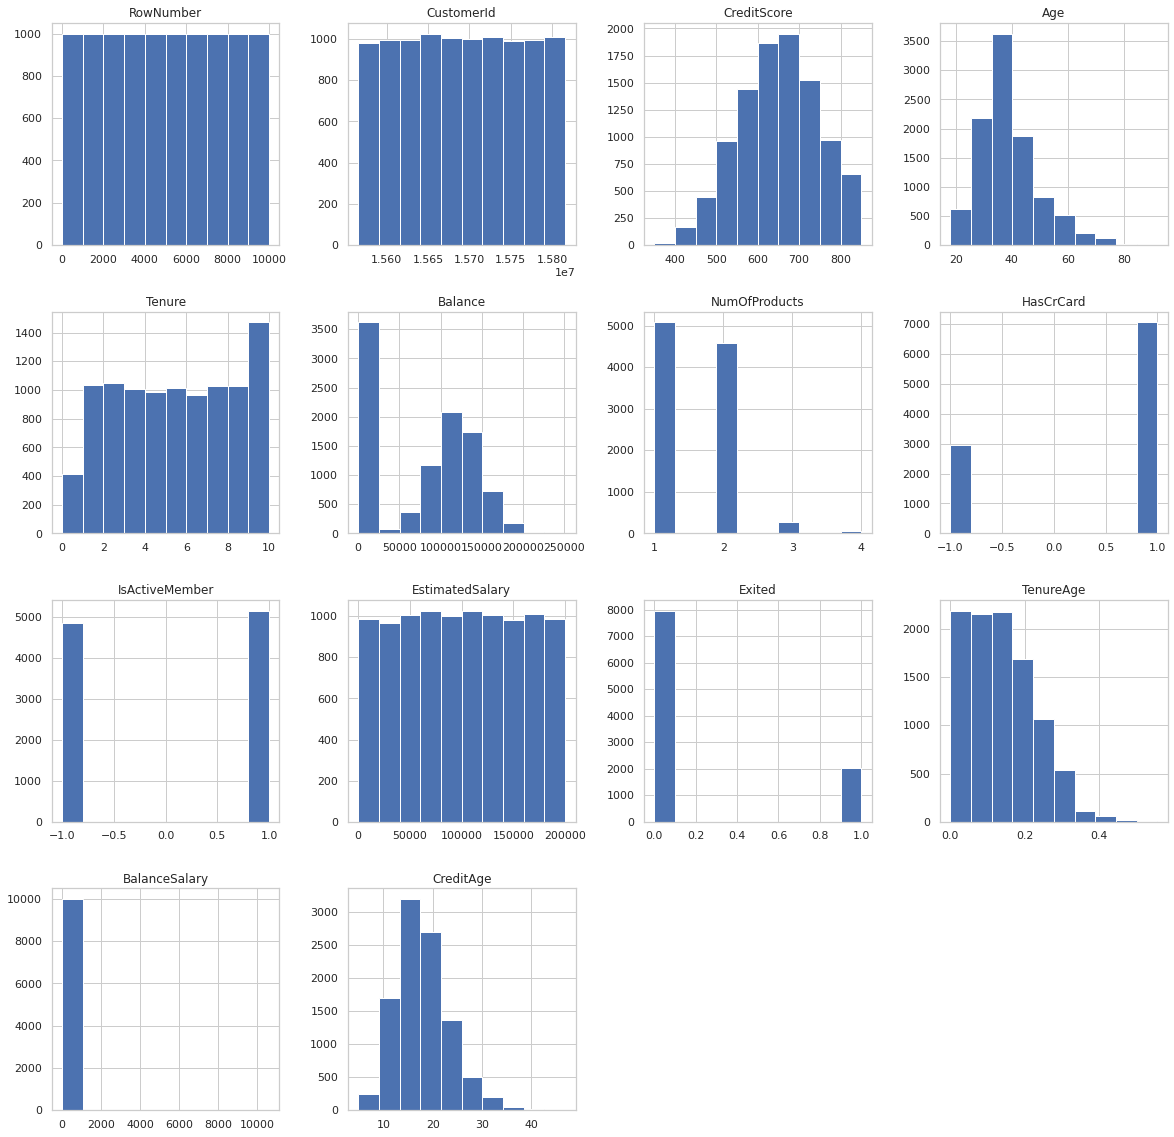

In [ ]:
df.hist(figsize=(20,20))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  TenureAge        10000 non-null  float64
 15  BalanceSalary    10000 non-null  float64
 16  CreditAge        10000 non-null  float64
dtypes: float64(5)

In [ ]:
df_variables_cont = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','TenureAge','BalanceSalary','CreditAge']
df_variables_cat = ['Geography','Gender','HasCrCard','IsActiveMember']

In [ ]:
df_aux = df[['Exited']+df_variables_cont+df_variables_cat]

In [ ]:
df_aux

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,TenureAge,BalanceSalary,CreditAge,Geography,Gender,HasCrCard,IsActiveMember
0,1,619,42,2,0.00,1,101348.88,0.047619,0.000000,14.738095,France,Female,1,1
1,0,608,41,1,83807.86,1,112542.58,0.024390,0.744677,14.829268,Spain,Female,-1,1
2,1,502,42,8,159660.80,3,113931.57,0.190476,1.401375,11.952381,France,Female,1,-1
3,0,699,39,1,0.00,2,93826.63,0.025641,0.000000,17.923077,France,Female,-1,-1
4,0,850,43,2,125510.82,1,79084.10,0.046512,1.587055,19.767442,Spain,Female,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,771,39,5,0.00,2,96270.64,0.128205,0.000000,19.769231,France,Male,1,-1
9996,0,516,35,10,57369.61,1,101699.77,0.285714,0.564108,14.742857,France,Male,1,1
9997,1,709,36,7,0.00,1,42085.58,0.194444,0.000000,19.694444,France,Female,-1,1
9998,1,772,42,3,75075.31,2,92888.52,0.071429,0.808230,18.380952,Germany,Male,1,-1


In [ ]:
le = LabelEncoder()
df_aux['Gender'] = le.fit_transform(df_aux['Gender'])
df_aux['Geography'] = le.fit_transform(df_aux['Geography'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_aux


,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,TenureAge,BalanceSalary,CreditAge,Geography,Gender,HasCrCard,IsActiveMember
0,1,619,42,2,0.00,1,101348.88,0.047619,0.000000,14.738095,0,0,1,1
1,0,608,41,1,83807.86,1,112542.58,0.024390,0.744677,14.829268,2,0,-1,1
2,1,502,42,8,159660.80,3,113931.57,0.190476,1.401375,11.952381,0,0,1,-1
3,0,699,39,1,0.00,2,93826.63,0.025641,0.000000,17.923077,0,0,-1,-1
4,0,850,43,2,125510.82,1,79084.10,0.046512,1.587055,19.767442,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,771,39,5,0.00,2,96270.64,0.128205,0.000000,19.769231,0,1,1,-1
9996,0,516,35,10,57369.61,1,101699.77,0.285714,0.564108,14.742857,0,1,1,1
9997,1,709,36,7,0.00,1,42085.58,0.194444,0.000000,19.694444,0,0,-1,1
9998,1,772,42,3,75075.31,2,92888.52,0.071429,0.808230,18.380952,1,1,1,-1


In [ ]:
scaler = MinMaxScaler()
df_aux[df_variables_cont] = scaler.fit_transform(df_aux[df_variables_cont])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
X = df_aux.drop('Exited',axis=1)
y = df_aux['Exited']

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state = 10)

In [ ]:
model = Sequential()
model.add(Dense(12,activation='relu'))#,input_dim=13
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test.values),batch_size=10,epochs=40,verbose=1)

Epoch 1/40
700/700 [==============================] - 2s 2ms/step - loss: 0.5099 - accuracy: 0.7963 - val_loss: 0.4788 - val_accuracy: 0.7933
Epoch 2/40
700/700 [==============================] - 1s 2ms/step - loss: 0.4705 - accuracy: 0.7952 - val_loss: 0.4603 - val_accuracy: 0.7933
Epoch 3/40
700/700 [==============================] - 1s 2ms/step - loss: 0.4443 - accuracy: 0.8007 - val_loss: 0.4489 - val_accuracy: 0.8010
Epoch 4/40
700/700 [==============================] - 1s 2ms/step - loss: 0.4200 - accuracy: 0.8192 - val_loss: 0.4402 - val_accuracy: 0.8113
Epoch 5/40
700/700 [==============================] - 1s 2ms/step - loss: 0.4266 - accuracy: 0.8186 - val_loss: 0.4365 - val_accuracy: 0.8110
Epoch 6/40
700/700 [==============================] - 1s 2ms/step - loss: 0.4180 - accuracy: 0.8280 - val_loss: 0.4320 - val_accuracy: 0.8207
Epoch 7/40
700/700 [==============================] - 1s 2ms/step - loss: 0.4212 - accuracy: 0.8292 - val_loss: 0.4306 - val_accuracy: 0.8203
Epoch 

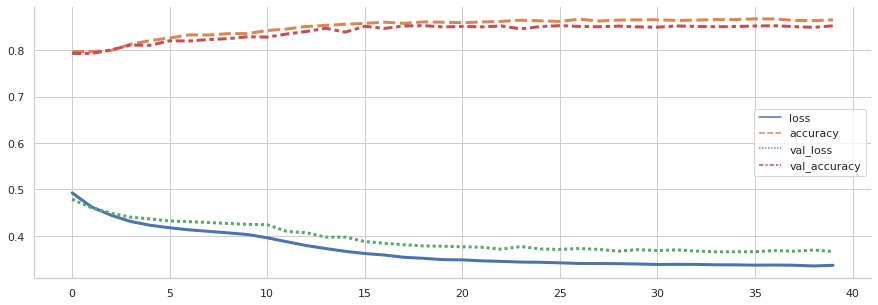

In [ ]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()

In [ ]:
svm = SVC(kernel='linear',verbose=True)
svm.fit(X_train,y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

In [ ]:
svm.score(X_train,y_train)

0.7975714285714286

In [ ]:
svm.score(X_test,y_test)

0.7933333333333333

In [ ]:
error = []
for n in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train,y_train)
  predic_n = knn.predict(X_test)
  error.append(np.mean(predic_n != y_test))

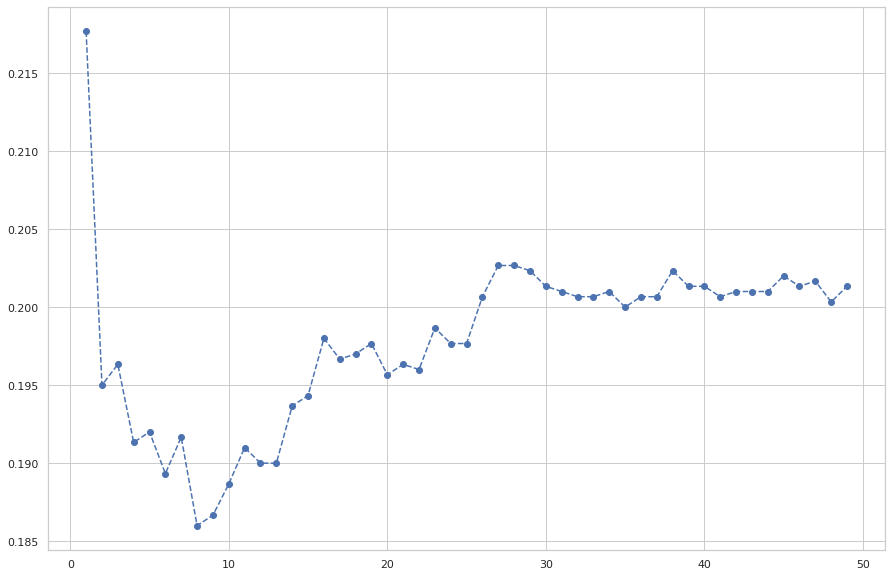

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(1,50),error,color='b',linestyle='dashed',marker='o',markerfacecolor ='b')

In [ ]:
knn_c = KNeighborsClassifier(n_neighbors=8)
knn_c.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
y_pred_Train = knn_c.predict(X_train)
y_pred_Test = knn_c.predict(X_test)

In [ ]:
print(accuracy_score(y_train,y_pred_Train))
print(accuracy_score(y_test,y_pred_Test))

0.8442857142857143
0.814
